In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [5]:
# Load your Tamil QA dataset
with open("TaQuAD_final.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [6]:
rows = []

for item in data['data']:
    for paragraph in item['paragraphs']:
        context = paragraph['context']
        for qa in paragraph['qas']:
            question = qa['question']
            is_impossible = qa['is_impossible']
            question_id = qa['id']

            if not qa['answers']:  # Unanswerable
                rows.append({
                    'question_id': question_id,
                    'question': question,
                    'context': context,
                    'is_impossible': is_impossible,
                    'answer': None,
                    'answer_start': None,
                    'answer_end': None,
                    'domain': None,
                    'document_id': None
                })
            else:
                for answer in qa['answers']:
                    rows.append({
                        'question_id': question_id,
                        'question': question,
                        'context': context,
                        'is_impossible': is_impossible,
                        'answer': answer['text'],
                        'answer_start': answer['answer_start'],
                        'answer_end': answer['answer_end'],
                        'domain': answer.get('domain', 'Unknown'),
                        'document_id': answer.get('document_id', None)
                    })


df = pd.DataFrame(rows)
df.head()


,question_id,question,context,is_impossible,answer,answer_start,answer_end,domain,document_id
0,11620,வேதியியல் தாக்கத்தின் மறுபெயர் என்ன?,"""வேதியியல் தாக்கம்"" அல்லது ""வேதிவினை"" என்பது ச...",False,வேதிவினை,28.0,36.0,Science,11015.0
1,11621,வேதிவினையின் மறுபெயர் என்ன?,"""வேதியியல் தாக்கம்"" அல்லது ""வேதிவினை"" என்பது ச...",False,வேதியியல் தாக்கம்,1.0,18.0,Science,11015.0
2,11622,"""வேதியியல் தாக்கம்"" அல்லது ""வேதிவினை"" என்ன?","""வேதியியல் தாக்கம்"" அல்லது ""வேதிவினை"" என்பது ச...",False,"""வேதியியல் தாக்கம்"" அல்லது ""வேதிவினை"" என்பது ச...",0.0,125.0,Science,11015.0
3,11623,"""வேதியியல் தாக்கம்"" அல்லது ""வேதிவினை"" எவ்வாறு ...","""வேதியியல் தாக்கம்"" அல்லது ""வேதிவினை"" என்பது ச...",False,ஒரு வேதிச் சமன்பாட்டினால் குறியீடாக வெளிப்படுத...,130.0,187.0,Science,11015.0
4,11624,"ஒரு வேதிச் சமன்பாட்டின் வலது பக்கத்திலும், இடத...","""வேதியியல் தாக்கம்"" அல்லது ""வேதிவினை"" என்பது ச...",False,"இச் சமன்பாடுகளின் வலது பக்கத்திலும், இடது பக்க...",189.0,309.0,Science,11015.0


In [7]:
print("Total questions (all):", df['question_id'].nunique())
print("Answerable questions:", df[df['is_impossible'] == False]['question_id'].nunique())
print("Unanswerable questions:", df[df['is_impossible'] == True]['question_id'].nunique())
print("Unique domains:", df['domain'].nunique())
print("Unique questions (text):", df['question'].nunique())
print("Unique contexts:", df['context'].nunique())


Total questions (all): 1000
Answerable questions: 776
Unanswerable questions: 224
Unique domains: 7
Unique questions (text): 1000
Unique contexts: 240


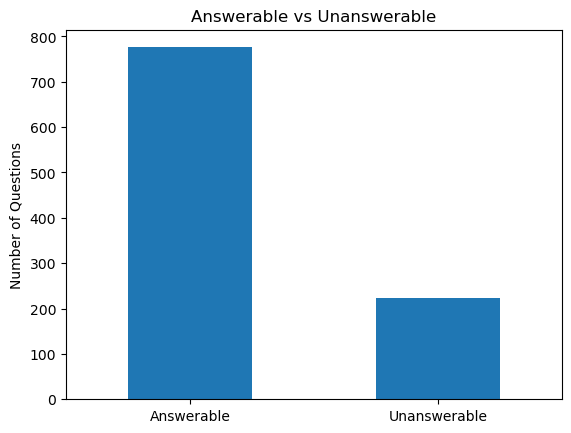

In [8]:
df['is_impossible'].value_counts().plot(kind='bar', title='Answerable vs Unanswerable')
plt.xticks(ticks=[0, 1], labels=['Answerable', 'Unanswerable'], rotation=0)
plt.ylabel('Number of Questions')
plt.show()


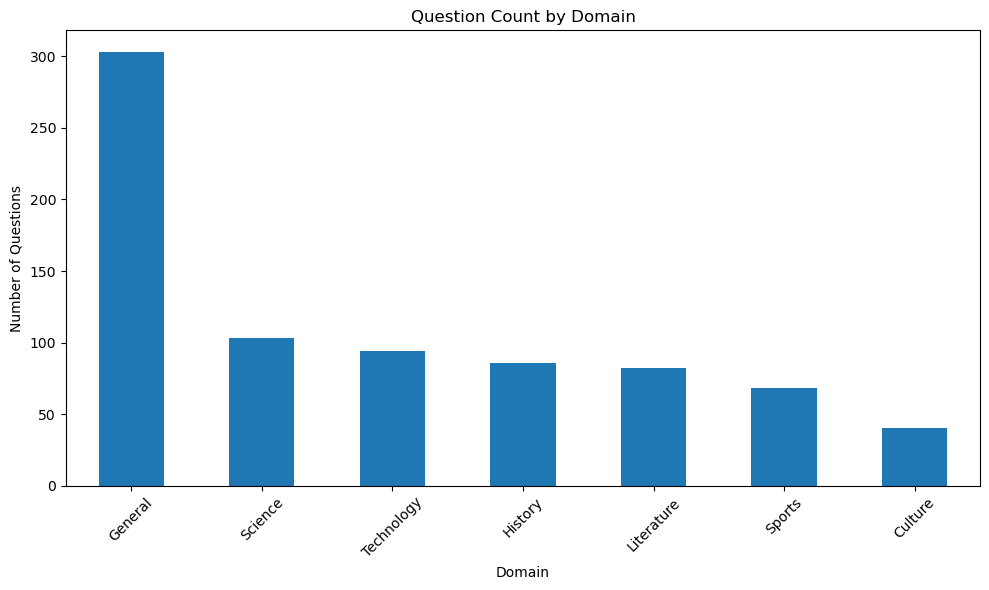

In [9]:
plt.figure(figsize=(10, 6))
df['domain'].value_counts().plot(kind='bar')
plt.title("Question Count by Domain")
plt.xlabel("Domain")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
domain_counts = df['domain'].value_counts()

print("Number of QA pairs in each domain:\n")
for domain, count in domain_counts.items():
    print(f"{domain}: {count}")


Number of QA pairs in each domain:

General: 303
Science: 103
Technology: 94
History: 86
Literature: 82
Sports: 68
Culture: 40


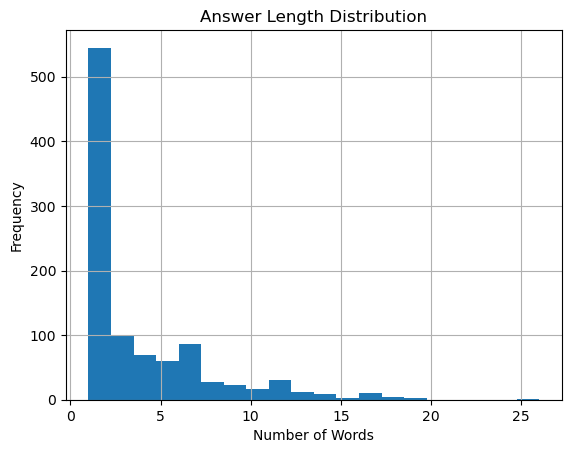

In [17]:
df['answer_length'] = df['answer'].apply(lambda x: len(str(x).split()))
df['answer_length'].hist(bins=20)
plt.title("Answer Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


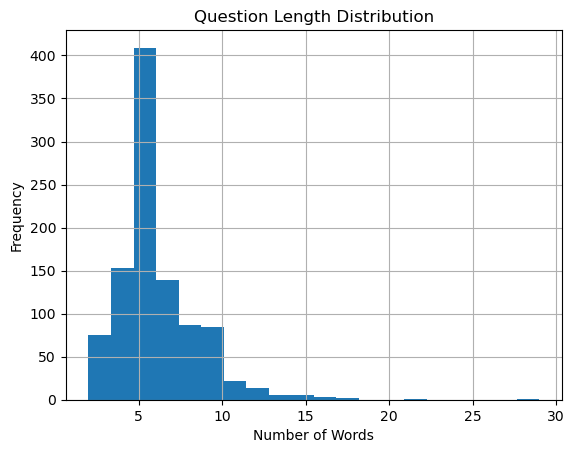

In [18]:
df['question_length'] = df['question'].apply(lambda x: len(x.split()))
df['question_length'].hist(bins=20)
plt.title("Question Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


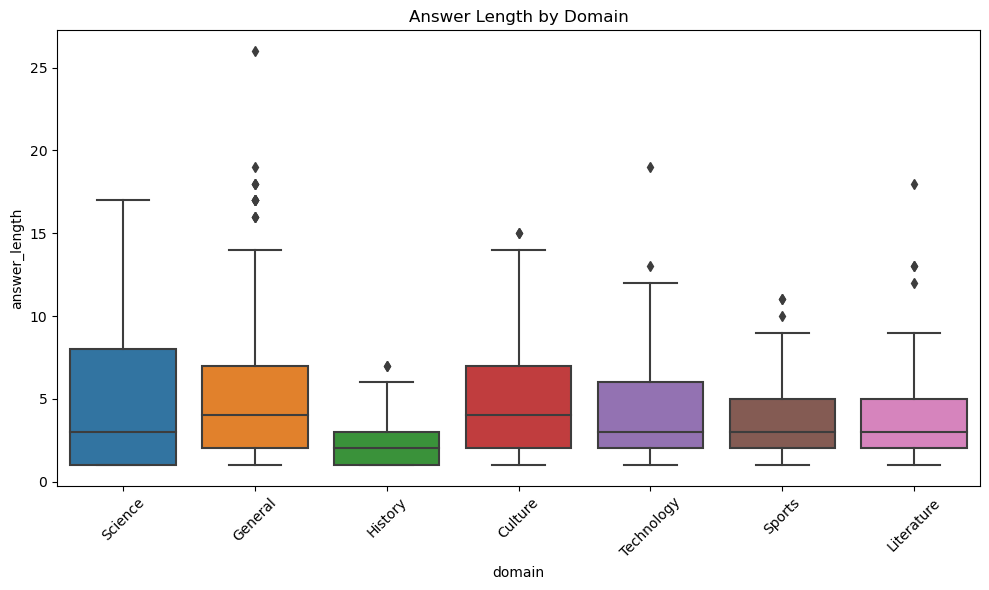

In [19]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='domain', y='answer_length')
plt.xticks(rotation=45)
plt.title("Answer Length by Domain")
plt.tight_layout()
plt.show()


In [20]:
print("Total QA pairs:", len(df))
print("Unique domains:", df['domain'].nunique())
print("Domain breakdown:\n", df['domain'].value_counts())


Total QA pairs: 1000
Unique domains: 7
Domain breakdown:
 General       303
Science       103
Technology     94
History        86
Literature     82
Sports         68
Culture        40
Name: domain, dtype: int64


C:\Users\jathusharini\AppData\Local\Temp\ipykernel_17808\2475617189.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\jathusharini\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


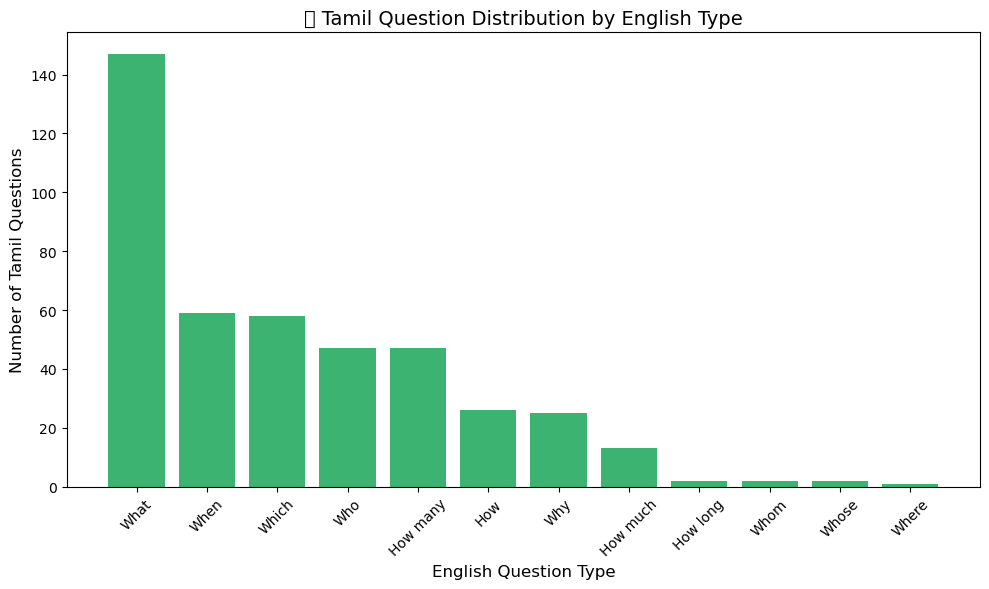

In [22]:
from collections import defaultdict

# Your question word mapping
question_words = {
    "What": ["என்ன"],
    "Why": ["எதற்கு", "எதனால்", "ஏன்"],
    "When": ["எப்போது"],
    "Where": ["எங்கே"],
    "Which": ["ஏது", "எது"],
    "Who": ["யார்"],
    "Whom": ["யாரை"],
    "Whose": ["யாருடைய"],
    "How": ["எப்படி"],
    "How long": ["எவ்வளவு நேரம்", "எவ்வளவு காலம்"],
    "How far": ["எவ்வளவு தூரத்தில்"],
    "How much": ["எவ்வளவு"],
    "How many": ["எத்தனை"],
    "How often": ["எவ்வளவு நேரம் இடைவிட்டு", "எத்தனை நாளுக்கொருமுறை"]
}

# Count questions per English category
english_counts = defaultdict(int)

for q in df['question'].dropna():
    for eng, tamil_list in question_words.items():
        if any(word in q for word in tamil_list):
            english_counts[eng] += 1
            break  # avoid double counting one question

# Sort results by count
sorted_counts = sorted(english_counts.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_counts)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='mediumseagreen')
plt.title("Tamil Question Distribution by English Type", fontsize=14)
plt.xlabel("English Question Type", fontsize=12)
plt.ylabel("Number of Tamil Questions", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
print("Tamil–English Question Word Mapping:\n")
for eng, tamil_words in question_words.items():
    tamil_list = ", ".join(tamil_words)
    print(f"{eng:10} → {tamil_list}")


Tamil–English Question Word Mapping:

What       → என்ன
Why        → எதற்கு, எதனால், ஏன்
When       → எப்போது
Where      → எங்கே
Which      → ஏது, எது
Who        → யார்
Whom       → யாரை
Whose      → யாருடைய
How        → எப்படி
How long   → எவ்வளவு நேரம், எவ்வளவு காலம்
How far    → எவ்வளவு தூரத்தில்
How much   → எவ்வளவு
How many   → எத்தனை
How often  → எவ்வளவு நேரம் இடைவிட்டு, எத்தனை நாளுக்கொருமுறை
